# Intro to Linear Algebra

## Segment 1: Data Structures for Algebra


### What Linear Algebra Is

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t = np.linspace(0, 40, 1000) # start, finish, n points

Distance travelled by robber: $d = 2.5t$

In [ ]:
d_r = 2.5 * t

Distance travelled by sheriff: $d = 3(t-5)$

In [ ]:
d_s = 3 * (t-5)

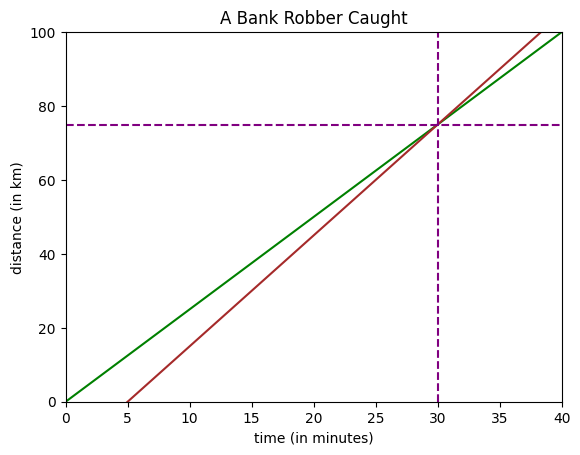

In [ ]:
fig, ax = plt.subplots()
plt.title('A Bank Robber Caught')
plt.xlabel('time (in minutes)')
plt.ylabel('distance (in km)')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='brown')
plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')

**Return to slides here.**

### Scalars (Rank 0 Tensors) in Base Python

In [ ]:
x = 25
x

25

In [ ]:
type(x) # if we'd like more specificity (e.g., int16, uint8), we need NumPy or another numeric library

float

In [ ]:
y = 3

In [ ]:
py_sum = x + y
py_sum

28

In [ ]:
type(py_sum)

int

In [ ]:
x_float = 25.0
float_sum = x_float + y
float_sum

28.0

In [ ]:
type(float_sum)

float

### Scalars in PyTorch

* PyTorch and TensorFlow are the two most popular *automatic differentiation* libraries (a focus of the [*Calculus I*] subjects in the *ML Foundations* series) in Python, itself the most popular programming language in ML.
* PyTorch tensors are designed to be pythonic, i.e., to feel and behave like NumPy arrays.
* The advantage of PyTorch tensors relative to NumPy arrays is that they easily be used for operations on GPU (see [here](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html) for example).
* Documentation on PyTorch tensors, including available data types, is [here](https://pytorch.org/docs/stable/tensors.html).

In [ ]:
import torch

In [ ]:
x_pt = torch.tensor(25) # type specification optional, e.g.: dtype=torch.float16
x_pt

tensor(25)

In [ ]:
x_pt.shape

torch.Size([3])

### Why does PyTorch use [ ] for scalars?
This follows the general rule:

A 0D tensor (scalar) → torch.Size([])

A 1D tensor (vector) with 3 elements → torch.Size([3])

A 2D tensor (matrix) with shape (2, 3) → torch.Size([2, 3])

and so on.

So [ ] means: “no dimensions at all,” which is what a scala

### Scalars in TensorFlow (version 2.0 or later)

Tensors created with a wrapper, all of which [you can read about here](https://www.tensorflow.org/guide/tensor):  

* `tf.Variable`
* `tf.constant`
* `tf.placeholder`
* `tf.SparseTensor`

Most widely-used is `tf.Variable`, which we'll use here.

As with TF tensors, in PyTorch we can similarly perform operations, and we can easily convert to and from NumPy arrays.

Also, a full list of tensor data types is available [here](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType).

In [ ]:
import tensorflow as tf

In [ ]:
x_tf = tf.Variable(25, dtype=tf.int16) # dtype is optional
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [ ]:
x_tf.shape

TensorShape([])

In [ ]:
y_tf = tf.Variable(3, dtype=tf.int16)

In [ ]:
print('This is the repr() (representation) that Colab or Jupyter uses to show detailed info')
x_tf + y_tf

This is the repr() (representation) that Colab or Jupyter uses to show detailed info


<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [ ]:
print(x_tf + y_tf)

tf.Tensor(28, shape=(), dtype=int16)


In [ ]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [ ]:
tf_sum.numpy() # note that NumPy operations automatically convert tensors to NumPy arrays, and vice versa

np.int16(28)

In [ ]:
type(tf_sum.numpy())

numpy.int16

In [ ]:
tf_float = tf.Variable(25., dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=25.0>

### Vectors (Rank 1 Tensors) in NumPy

In [ ]:
x = np.array([25, 2, 5]) # type argument is optional, e.g.: dtype=np.float16
x

array([25,  2,  5])

In [ ]:
len(x)

3

In [ ]:
x.shape

(3,)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x[0] # zero-indexed

np.int64(25)

In [ ]:
type(x[0])

numpy.int64

### Vector Transposition

In [ ]:
# Transposing a regular 1-D array has no effect...
x_t = x.T
x_t

array([25,  2,  5])

In [ ]:
x_t.shape

(3,)

In [ ]:
# ...but it does we use nested "matrix-style" brackets:
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [ ]:
y.shape

(1, 3)

In [ ]:
# ...but can transpose a matrix with a dimension of length 1, which is mathematically equivalent:
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [ ]:
y_t.shape # this is a column vector as it has 3 rows and 1 column

(3, 1)

In [ ]:
# Column vector can be transposed back to original row vector:
y_t.T

array([[25,  2,  5]])

In [ ]:
y_t.T.shape

(1, 3)

### Zero Vectors

Have no effect if added to another vector

In [ ]:
z = np.zeros(3)
z

array([0., 0., 0.])

### Vectors in PyTorch and TensorFlow

In [ ]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [ ]:
x_tf = tf.Variable([25, 2, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

### $L^2$ Norm

In [ ]:
x

array([25,  2,  5])

In [ ]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [ ]:
np.linalg.norm(x)

np.float64(25.573423705088842)

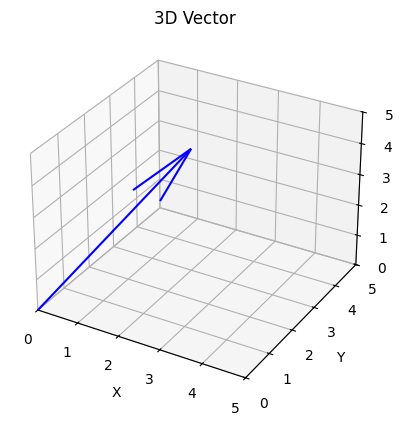

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Vector
v = np.array([2, 3, 4])

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw the vector
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue')

# Set axis limits
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

plt.show()


So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

### $L^1$ Norm

In [ ]:
x

array([25,  2,  5])

In [ ]:
np.abs(25) + np.abs(2) + np.abs(5)

np.int64(32)

### Squared $L^2$ Norm

In [ ]:
x

array([25,  2,  5])

In [ ]:
(25**2 + 2**2 + 5**2)

654

In [ ]:
# we'll cover tensor multiplication more soon but to prove point quickly:
np.dot(x, x)

np.int64(654)

### Max Norm

In [ ]:
x

array([25,  2,  5])

In [ ]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

np.int64(25)

### Orthogonal Vectors

In [ ]:
i = np.array([1, 0])
i

array([1, 0])

In [ ]:
j = np.array([0, 1])
j

array([0, 1])

In [ ]:
np.dot(i, j) # detail on the dot operation coming up...

np.int64(0)

### Matrices (Rank 2 Tensors) in NumPy

In [ ]:
# Use array() with nested brackets:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X.shape

(3, 2)

In [ ]:
X.size

6

In [ ]:
# Select left column of matrix X (zero-indexed)
X[:,0]

array([25,  5,  3])

In [ ]:
# Select middle row of matrix X:
X[1,:]

array([ 5, 26])

In [ ]:
# Another slicing-by-index example:
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])

### Matrices in PyTorch

In [ ]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [ ]:
X_pt.shape # pythonic relative to TensorFlow

torch.Size([3, 2])

In [ ]:
X_pt[1,:] # N.B.: Python is zero-indexed; written algebra is one-indexed

tensor([ 5, 26])

### Matrices in TensorFlow

In [ ]:
X_tf = tf.Variable([[[25, 2], [5, 26], [3, 7],[25, 2], [5, 26], [3, 7]],[[25, 2], [5, 26], [3, 7],[25, 2], [5, 26], [3, 7]]])
X_tf

<tf.Variable 'Variable:0' shape=(2, 6, 2) dtype=int32, numpy=
array([[[25,  2],
        [ 5, 26],
        [ 3,  7],
        [25,  2],
        [ 5, 26],
        [ 3,  7]],

       [[25,  2],
        [ 5, 26],
        [ 3,  7],
        [25,  2],
        [ 5, 26],
        [ 3,  7]]], dtype=int32)>

In [ ]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [ ]:
tf.shape(X_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 6, 2], dtype=int32)>

In [ ]:
X_tf[1,:]

<tf.Tensor: shape=(6, 2), dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7],
       [25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

**Return to slides here.**

### Higher-Rank Tensors

As an example, rank 4 tensors are common for images, where each dimension corresponds to:

1. Number of images in training batch, e.g., 32
2. Image height in pixels, e.g., 28 for [MNIST digits](http://yann.lecun.com/exdb/mnist/)
3. Image width in pixels, e.g., 28
4. Number of color channels, e.g., 3 for full-color images (RGB)

In [ ]:
images_pt = torch.zeros([32, 28, 28, 3])

In [ ]:
#images_pt

In [ ]:
images_tf = tf.zeros([32, 28, 28, 3])

In [ ]:
# images_tf

## 2: Common Tensor Operations

### Tensor Transposition

In [ ]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [ ]:
X_pt.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

In [ ]:
tf.transpose(X_tf) # less Pythonic

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]], dtype=int32)>

### Basic Arithmetical Properties

Adding or multiplying with scalar applies operation to all elements and tensor shape is retained:

In [ ]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X*2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [ ]:
X+2

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [ ]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [ ]:
X_pt*2+2 # Python operators are overloaded; could alternatively use torch.mul() or torch.add()

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [ ]:
torch.add(torch.mul(X_pt, 2), 2)

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [ ]:
X_tf*2+2 # Operators likewise overloaded; could equally use tf.multiply() tf.add()

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [ ]:
tf.add(tf.multiply(X_tf, 2), 2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

If two tensors have the same size, operations are often by default applied element-wise. This is **not matrix multiplication**, which we'll cover later, but is rather called the **Hadamard product** or simply the **element-wise product**.

The mathematical notation is $A \odot X$

In [ ]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
A = X+2
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [ ]:
A + X

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [ ]:
A * X

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

In [ ]:
A_pt = X_pt + 2

In [ ]:
A_pt + X_pt

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [ ]:
A_pt * X_pt

tensor([[675,   8],
        [ 35, 728],
        [ 15,  63]])

In [ ]:
A_tf = X_tf + 2

In [ ]:
A_tf + X_tf

<tf.Tensor: shape=(2, 6, 2), dtype=int32, numpy=
array([[[52,  6],
        [12, 54],
        [ 8, 16],
        [52,  6],
        [12, 54],
        [ 8, 16]],

       [[52,  6],
        [12, 54],
        [ 8, 16],
        [52,  6],
        [12, 54],
        [ 8, 16]]], dtype=int32)>

In [ ]:
A_tf * X_tf

<tf.Tensor: shape=(2, 6, 2), dtype=int32, numpy=
array([[[675,   8],
        [ 35, 728],
        [ 15,  63],
        [675,   8],
        [ 35, 728],
        [ 15,  63]],

       [[675,   8],
        [ 35, 728],
        [ 15,  63],
        [675,   8],
        [ 35, 728],
        [ 15,  63]]], dtype=int32)>

### Reduction

Calculating the sum across all elements of a tensor is a common operation. For example:

* For vector ***x*** of length *n*, we calculate $\sum_{i=1}^{n} x_i$
* For matrix ***X*** with *m* by *n* dimensions, we calculate $\sum_{i=1}^{m} \sum_{j=1}^{n} X_{i,j}$

In [ ]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X.sum()

np.int64(68)

In [ ]:
torch.sum(X_pt)

tensor(68)

In [ ]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

In [ ]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
# Can also be done along one specific axis alone, e.g.:
X.sum(axis=0) # summing over all rows (i.e., along columns)

array([33, 35])

In [ ]:
X.sum(axis=1) # summing over all columns (i.e., along rows)

array([27, 31, 10])

In [ ]:
torch.sum(X_pt, 0)

tensor([33, 35])

In [ ]:
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([27, 31, 10], dtype=int32)>

Many other operations can be applied with reduction along all or a selection of axes, e.g.:

* maximum
* minimum
* mean
* product

They're fairly straightforward and used less often than summation, so you're welcome to look them up in library docs if you ever need them.

### The Dot Product

If we have two vectors (say, ***x*** and ***y***) with the same length *n*, we can calculate the dot product between them. This is annotated several different ways, including the following:

* $x \cdot y$
* $x^Ty$
* $\langle x,y \rangle$

Regardless which notation you use (I prefer the first), the calculation is the same; we calculate products in an element-wise fashion and then sum reductively across the products to a scalar value. That is, $x \cdot y = \sum_{i=1}^{n} x_i y_i$

The dot product is ubiquitous in deep learning: It is performed at every artificial neuron in a deep neural network, which may be made up of millions (or orders of magnitude more) of these neurons.

In [ ]:
x

array([25,  2,  5])

In [ ]:
y = np.array([0, 1, 2])
y

array([0, 1, 2])

In [ ]:
25*0 + 2*1 + 5*2

12

In [ ]:
np.dot(x, y)

np.int64(12)

In [ ]:
x_pt

tensor([25,  2,  5])

In [ ]:
y_pt = torch.tensor([0, 1, 2])
y_pt

tensor([0, 1, 2])

In [ ]:
np.dot(x_pt, y_pt)

/tmp/ipython-input-137-91207232.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.dot(x_pt, y_pt)


np.int64(12)

In [ ]:
np.dot(x_pt.numpy(), y_pt.numpy())

np.int64(12)

In [ ]:
torch.dot(torch.tensor([25, 2, 5.]), torch.tensor([0, 1, 2.]))

tensor(12.)

In [ ]:
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

In [ ]:
y_tf = tf.Variable([0, 1, 2])
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [ ]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))# reduce_sum  sums all elements of the tensor you pass to it.and multiply This does element-wise multiplication:

<tf.Tensor: shape=(), dtype=int32, numpy=12>

## 3: Matrix Properties

### Frobenius Norm
sum of all elemnts square under the root

In [ ]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [ ]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [ ]:
np.linalg.norm(X) # same function as for vector L2 norm

np.float64(5.477225575051661)

In [ ]:
X_pt = torch.tensor([[1, 2], [3, 4.]]) # torch.norm() supports floats only

In [ ]:
torch.norm(X_pt)

tensor(5.4772)

In [ ]:
X_tf = tf.Variable([[1, 2], [3, 4.]]) # tf.norm() also supports floats only

In [ ]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

### Matrix Multiplication (with a Vector)
When you multiply a matrix by a vector, the result is a new vector.

Mathematical Form:
If you have:

A matrix
𝐴
A of size
𝑚
×
𝑛
m×n

A vector
𝑥
x of size
𝑛
×
1
n×1

Then the multiplication:

𝐴
⋅
𝑥
=
𝑦
A⋅x=y
will produce a new vector
𝑦
y of size
𝑚
×
1
m×1

In [ ]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
b = np.array([1, 2])
b

array([1, 2])

In [ ]:
np.dot(A, b) # even though technically dot products are between vectors only
# np.dot() function in NumPy is overloaded
#If you want element-wise multiplication: Use np.multiply(a, b)

array([11, 17, 23])

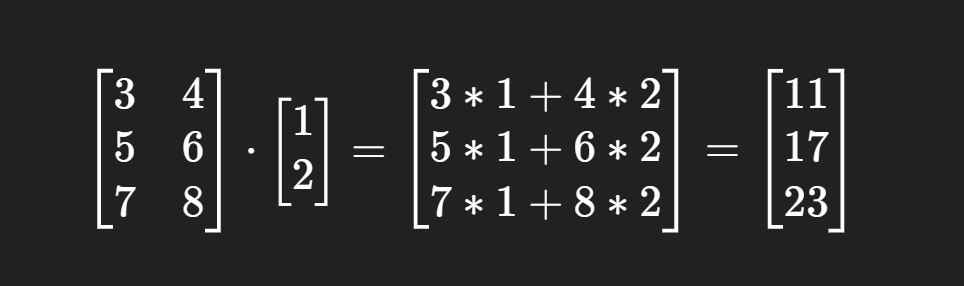

In [ ]:
import tensorflow as tf

A_pt = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_pt

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
b_pt = torch.tensor([1, 2])
b_pt

tensor([1, 2])

In [ ]:
torch.matmul(A_pt, b_pt) # like np.dot(), automatically infers dims in order to perform dot product, matvec, or matrix multiplication

tensor([11, 17, 23])

In [ ]:
A_tf = tf.Variable([[3, 4], [5, 6], [7, 8]])
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]], dtype=int32)>

In [ ]:
b_tf = tf.Variable([1, 2])
b_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

In [ ]:
tf.linalg.matvec(A_tf, b_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23], dtype=int32)>

### Matrix Multiplication (with Two Matrices)

In [ ]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [ ]:
np.dot(A,B)

array([[11, 27],
       [17, 45],
       [23, 63]])

Note that matrix multiplication is not "commutative" (i.e., $AB \neq BA$) so uncommenting the following line will throw a size mismatch error:

In [ ]:
# np.dot(B, A)

In [ ]:
B_pt = torch.from_numpy(B) # much cleaner than TF conversion
B_pt

tensor([[1, 9],
        [2, 0]])

In [ ]:
# another neat way to create the same tensor with transposition:
B_pt = torch.tensor([[1, 2], [9, 0]]).T
B_pt

tensor([[1, 9],
        [2, 0]])

In [ ]:
torch.matmul(A_pt, B_pt) # no need to change functions, unlike in TF

tensor([[11, 27],
        [17, 45],
        [23, 63]])

In [ ]:
B_tf = tf.convert_to_tensor(B, dtype=tf.int32)
B_tf

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 9],
       [2, 0]], dtype=int32)>

In [ ]:
tf.matmul(A_tf, B_tf)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]], dtype=int32)>

### Symmetric Matrices

In [ ]:
X_sym = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [ ]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [ ]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Identity Matrices

In [ ]:
I = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [ ]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [ ]:
torch.matmul(I, x_pt)

tensor([25,  2,  5])

### Matrix Inversion

In [ ]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [ ]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

### Orthogonal Matrices

These are the solutions to Exercises 3 and 4 on **orthogonal matrices** from the slides.

For Exercise 3, to demonstrate the matrix $I_3$ has mutually orthogonal columns, we show that the dot product of any pair of columns is zero:

In [ ]:
I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
column_1 = I[:,0]
column_1

array([1, 0, 0])

In [ ]:
column_2 = I[:,1]
column_2

array([0, 1, 0])

In [ ]:
column_3 = I[:,2]
column_3

array([0, 0, 1])

In [ ]:
np.dot(column_1, column_2)

np.int64(0)

In [ ]:
np.dot(column_1, column_3)

np.int64(0)

In [ ]:
np.dot(column_2, column_3)

np.int64(0)

We can use the `np.linalg.norm()` method from earlier in the notebook to demonstrate that each column of $I_3$ has unit norm:

In [ ]:
np.linalg.norm(column_1)

np.float64(1.0)

In [ ]:
np.linalg.norm(column_2)

np.float64(1.0)

In [ ]:
np.linalg.norm(column_3)

np.float64(1.0)